# Computer Vision - P2

· **RGB and gray histogram visualization** --> x-axis with the number of bins not the value of the bin 

· **Convolutions** --> **horizontal** mask using the function ndimage.convolve() of the package scipy, **transposed** version of the mask in (2), **uniform two-dimensional mask** of dimensions 15x15 with all values set to 1.

 ·**Convolve RGB image 3-channel filter**
 
 ·**Rescale, resize and downscale** --> and display histograms to appreciate changes
 
 ·**Plot histograms**
 
 ·**Gaussian and median filter**
 
 ·**Prewitt, sobel i canny edge detectors**
 
 ·**Applying smoothing in order to obtain hybrid images** --> Apply a low-pass filter. Apply a high-pass filter.
 
 ·**Anonimization of videos**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

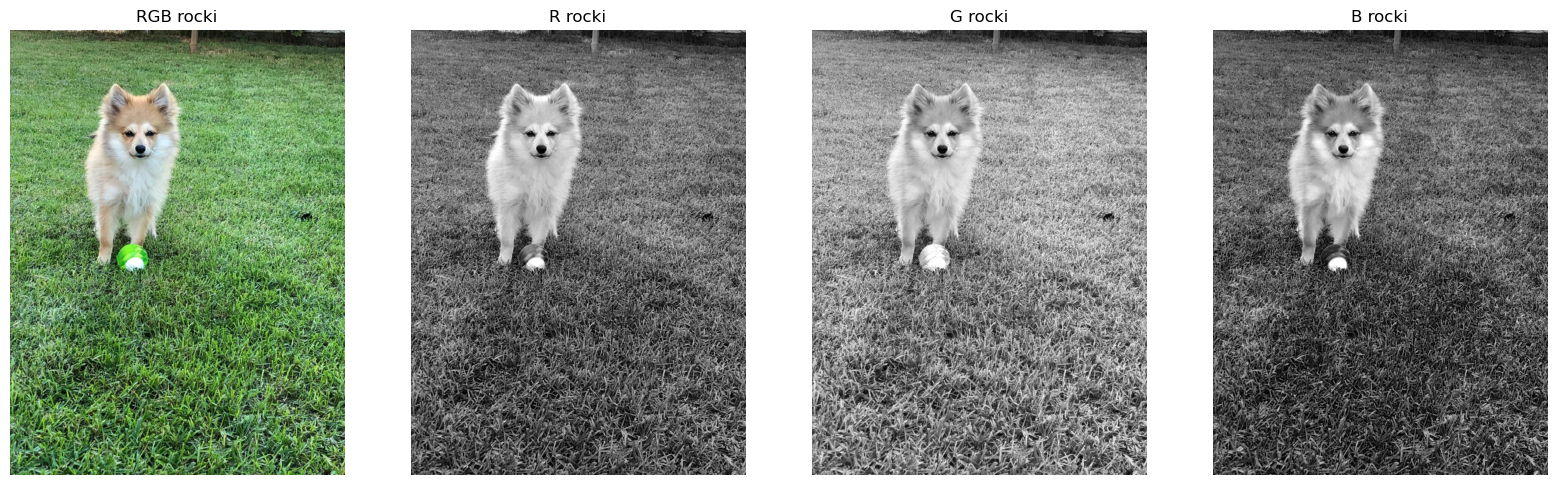

Shape: (1024, 768, 3)
Data type: uint8


In [14]:
from skimage import io
from matplotlib import pyplot as plt

# Read image
rocki = io.imread('images_notebook/rocki.jpeg')

fig = plt.figure(figsize=(25,40))
titles = ["R", "G", "B"]

# RGB rocki
fig.add_subplot(5, 5, 1)
plt.title("RGB rocki")
plt.imshow(rocki)
plt.axis('off')

# Channels separately in grayscale
for i,t in enumerate(titles):
    fig.add_subplot(5, 5, i+2)
    plt.title(f"{t} rocki")
    plt.imshow(rocki[:,:,i], cmap='gray')
    plt.axis('off')

plt.show()

# Dimensions and data type
print(f"Shape: {rocki.shape}\nData type: {rocki.dtype}")
plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

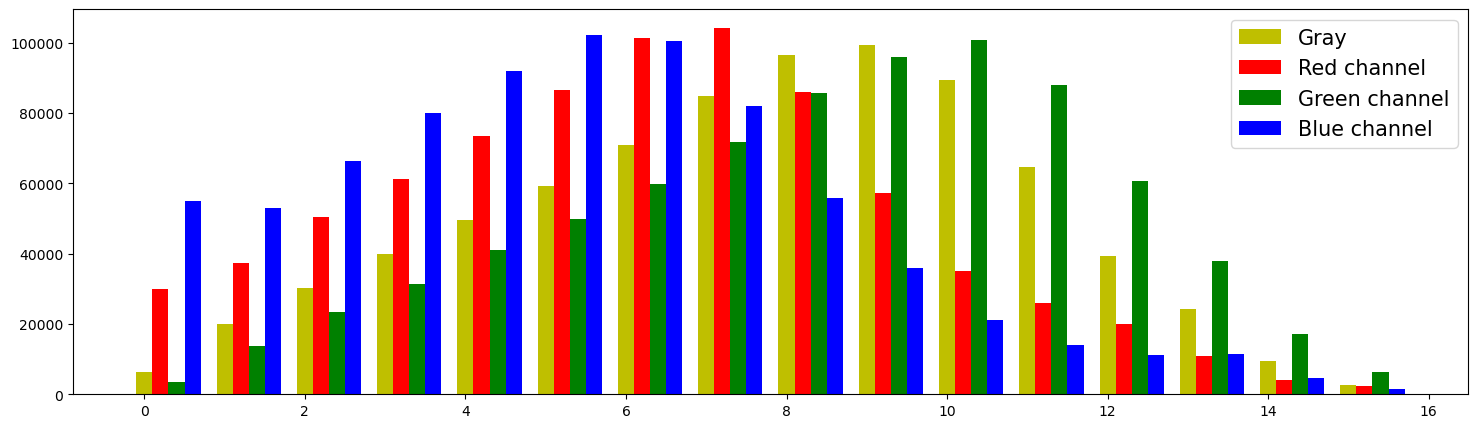

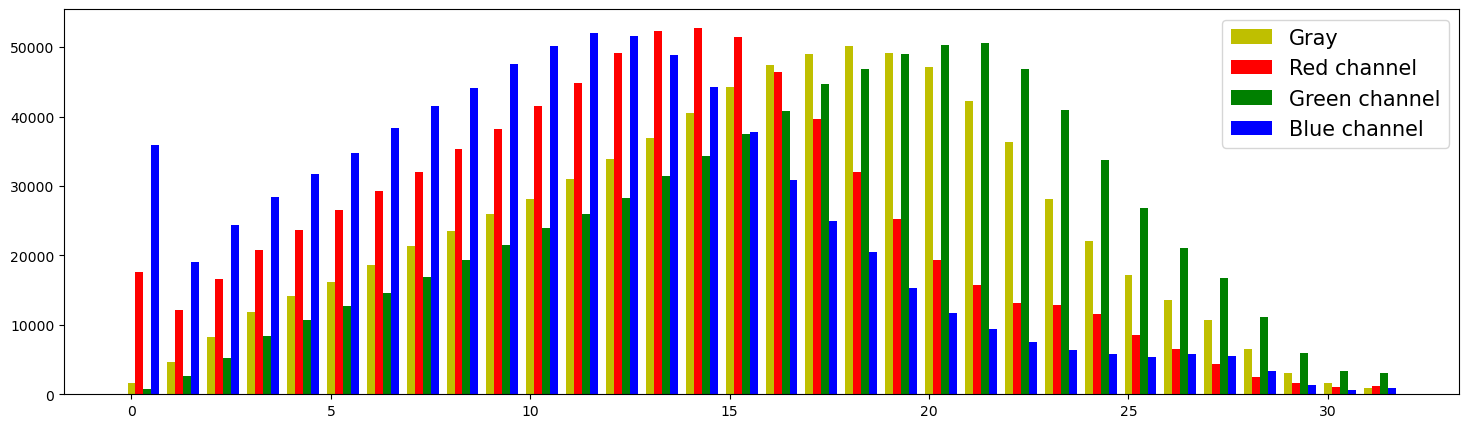

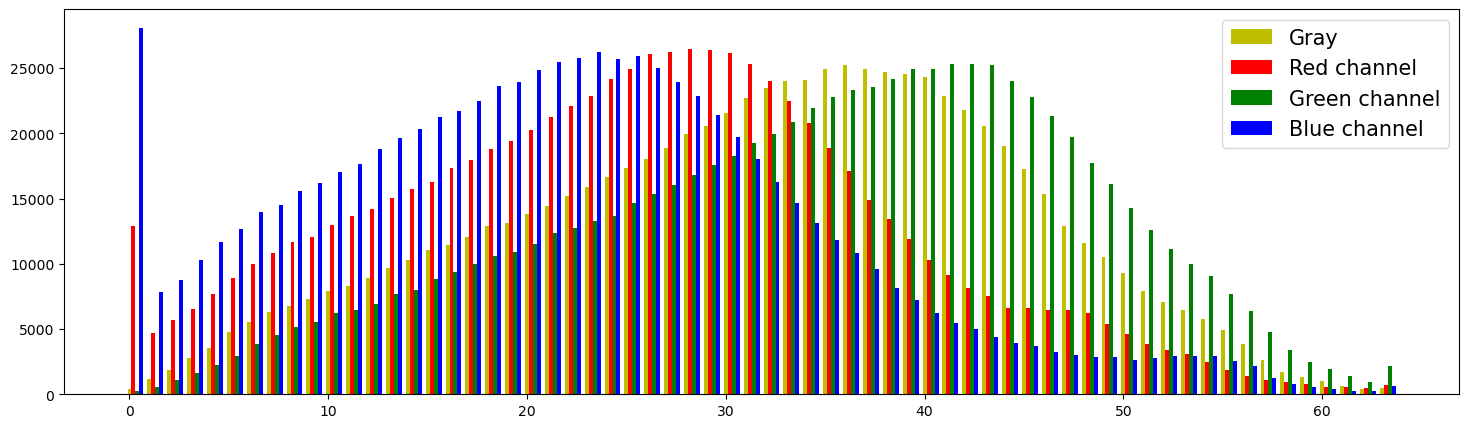

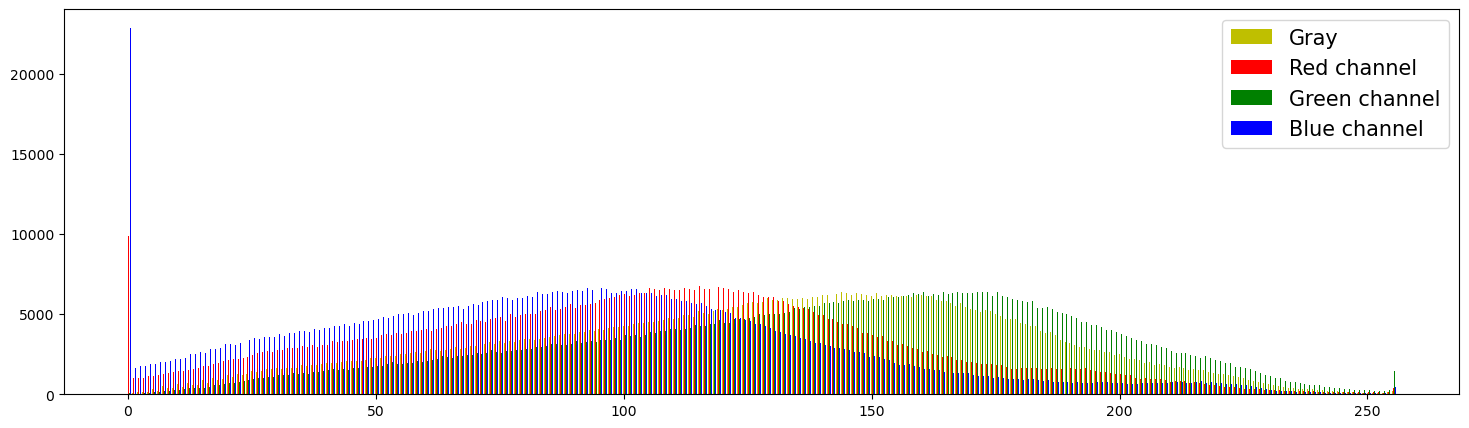

In [15]:
from skimage.exposure import histogram # For the histogram
from skimage import img_as_float       # Float image needed for histogram
from skimage.color import rgb2gray     # Grayscale image needed
import numpy as np                    

# It can be used for both, RGB and grayscale images
def im_hist(im, nbins=8):
    # Data for plotting
    labels = ["Gray", "Red channel", "Green channel", "Blue channel"]
    colors = ["y", "r", "g", "b"]
    ind = np.arange(nbins)
    fig = plt.figure(figsize=(18,5))
    
    # Images obtention
    float_im = img_as_float(im)
    imgs = [rgb2gray(float_im), float_im[:,:,0], float_im[:,:,1], float_im[:,:,2]] if im.ndim == 3 else [im]
    
    
    
    #IMPORTANT!! Alternativa per si volem que el eix x sigui els diferents valors dels píxels que prenen les bins:
    """
    FEM SERVIR EL plt.bar([0.5], [0]) per que ens centri els valors de 0 a 1... m'ho he inventat però funciona
    plt.bar([0.5], [0])
    for i,(img,c) in enumerate(zip(imgs,colors)):
        #ind + .1i displays the different plots in different positions. ind indicates the positions of the bin, and the offset is to display them all next to eachother
        #.2 is to define the width of the bin
        #Aqui, en comptes de passar-li una enumeració ordenada que indica el nombre de cada bin, li passes el valor que simbolitza cada bin, que ens retorna histogram()
        plt.bar(histogram(img, nbins=nbins)[1], histogram(img, nbins=nbins)[0], .005, color=c)
        plt.legend(labels, fontsize="15")
    plt.show()"""
    
    
    # Histogram
    for i,(img,c) in enumerate(zip(imgs,colors)):
        #ind + .1i displays the different plots in different positions. ind indicates the positions of the bin, and the offset is to display them all next to eachother
        #.2 is to define the width od the bin
        plt.bar(ind + .2*i, histogram(img, nbins=nbins)[0], .2, color=c)
    plt.legend(labels, fontsize="15")
    plt.show()

for n in [16,32,64,256]:
    im_hist(rocki, n)


### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


NameError: name 'ndimage' is not defined

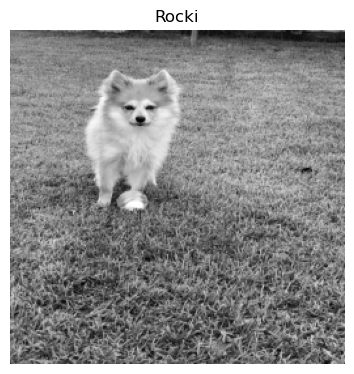

In [16]:
from skimage.transform import resize  # To reshape the image to the desired pixels
from scipy.ndimage import convolve    # To convolve the image

fig = plt.figure(figsize=(25,50))

#Reshape to a defined size
fig.add_subplot(5, 5, 1)
rocki = resize(io.imread('images_notebook/rocki.jpeg'), (256,256))
rocki_gray = rgb2gray(rocki)
plt.imshow(rocki_gray, cmap="gray")
plt.title("Rocki")
plt.axis('off')

#It's necessary to normalize to avoid exceed the maximum value of a pixel values range
mask_h1d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])/ len([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
im1 = ndimage.convolve(rocki_gray, mask_h1d, mode='constant', cval=0.0)
fig.add_subplot(5, 5, 2)
plt.imshow(im1, cmap="gray")
plt.title("First convolution")
plt.axis('off')

im2 = ndimage.convolve(rocki_gray, mask_h1d.T, mode='constant', cval=0.0)
fig.add_subplot(5, 5, 3)
plt.imshow(im2, cmap="gray")
plt.title("Second convolution")
plt.axis('off')

mask_15 = np.ones((15,15))/(15*15)
im3 = ndimage.convolve(rocki_gray, mask_15, mode='constant', cval=0.0)
fig.add_subplot(5, 5, 4)
plt.imshow(im3, cmap="gray")
plt.title("Third convolution")
plt.axis('off')
 
print("Showing details (Convolution 1 - Convolution 2 - Convolution 3):")
print(f"\t- Data type: {im1.dtype} - {im2.dtype} - {im3.dtype}")
print(f"\t- Max value: {np.round(im1.max(),5)} - {np.round(im2.max(),5)} - {np.round(im3.max(),5)}")
print(f"\t- Min value: {np.round(im1.min(),5)} - {np.round(im2.min(),5)} - {np.round(im3.min(),5)}")

b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


In [ ]:
#Without enhancement
print("Images without enhancement")
fig = plt.figure(figsize=(25,50))

fig.add_subplot(5, 5, 1)
plt.imshow(rocki_gray, cmap="gray", vmin=0, vmax=1)
plt.title("Rocki")
plt.axis('off')

fig.add_subplot(5, 5, 2)
plt.imshow(im1, cmap="gray", vmin=0, vmax=1)
plt.title("First convolution")
plt.axis('off')

fig.add_subplot(5, 5, 3)
plt.imshow(im2, cmap="gray", vmin=0, vmax=1)
plt.title("Second convolution")
plt.axis('off')

fig.add_subplot(5, 5, 4)
plt.imshow(im3, cmap="gray", vmin=0, vmax=1)
plt.title("Third convolution")
plt.axis('off')

plt.show()

print("Images with enhancement")

#With enhancement
fig2 = plt.figure(figsize=(25,50))

fig2.add_subplot(5, 5, 1)
plt.imshow(rocki_gray, cmap="gray")
plt.title("Rocki")
plt.axis('off')

fig2.add_subplot(5, 5, 2)
plt.imshow(im1, cmap="gray")
plt.title("First convolution")
plt.axis('off')

fig2.add_subplot(5, 5, 3)
plt.imshow(im2, cmap="gray")
plt.title("Second convolution")
plt.axis('off')

fig2.add_subplot(5, 5, 4)
plt.imshow(im3, cmap="gray")
plt.title("Third convolution")
plt.axis('off')

plt.show()

print(im3.min(), im3.max())


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


In [ ]:
#Create a void image with dimension equal to another image and then convolve it
def conv_coor(image, mask):
    convolved = np.empty(image.shape)
    for i in range(3):
        convolved[:,:,i] = ndimage.convolve(image[:,:,i], mask, mode='constant', cval=0.0)
    return convolved
    
rocki = resize(io.imread('images_notebook/rocki.jpeg'), (256,256))
unif_mask = np.ones((15,15))/(15*15)
convolved_img = conv_coor(rocki, unif_mask)
plt.imshow(convolved_img)
plt.show()

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.

The first image is smaller, hence its histogram reaches less frequency values than the big one (a maximum frequency near 70 the former and near 600000 the latter). The histogram from the second image is smoother and in the first one there are 2 zones in which the frequency accumulates, with more difference between consecutive bins.

### Rescale, resize, and downscale
**Rescale** operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

**Resize** serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

**Downscale** serves the purpose of down-sampling an n-dimensional image by integer factors using the local mean on the elements of each block of the size factors given as a parameter to the function.

**Note that when down-sampling an image, resize and rescale should perform Gaussian smoothing to avoid aliasing artifacts. See the anti_aliasing and anti_aliasing_sigma arguments to these functions.**



In [ ]:
from skimage.transform import rescale
from skimage.exposure import histogram

downscaled = rescale(rocki_gray, 0.1)
upscaled = rescale(rocki_gray, 10)

#im_hist function defined at the beggining of this practicum
im_hist(downscaled, 32)
im_hist(upscaled, 32)



b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why. **First, the majority of the pixels are in some defined values of pixel, then when it gets rescaled to a smaller image, the amount of pixels is reduced in all cases, so as we are applying a mask of dimension 15x15, it occupies a lot of space in the image, the pixels are very influenced for the rest of the image, so in tis case we get a more uniformed histogram, due to the uniformity of the pixels values. When the image is bigger, the mask only infeer in pixels that are similar to the value that we are convolving, so we don't have that feature of uniformity in the histogram, and more or less it mantains the shape of the first one**

In [ ]:
unif_mask = np.ones((15,15))/(15*15)
conv1 = ndimage.convolve(rocki_gray, unif_mask, mode='constant', cval=0.0)
print("First histogram")
im_hist(conv1, 32)

conv2 = ndimage.convolve(downscaled, unif_mask, mode='constant', cval=0.0)
for i in range(9):
    conv2 = ndimage.convolve(conv2, unif_mask, mode='constant', cval=0.0)
print("Second histogram")
im_hist(conv2, 32)

conv3 = ndimage.convolve(upscaled, unif_mask, mode='constant', cval=0.0)
for i in range(9):
    conv3 = ndimage.convolve(conv3, unif_mask, mode='constant', cval=0.0)
print("Third histogram")
im_hist(conv3, 32)



### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

**Gaussian filter convolves an image with a kernel based on a 2D Gaussian, smoothing the image. Bigger sigma means more smoothing, distorting it. Median filter assigns, to each pixel, the median of the values of those close (within a radius of k pixels). This removes salt & pepper and impulse noise.**

In [ ]:
from skimage.filters import gaussian, median
from skimage.morphology import disk          # To determine radius of pixels involved in median filter

#Gaussian with sigma=1
img1 = gaussian(rocki_gray, 1)
#Gaussian with sigma = 0.1, the lower sigma, the less smothness
img2 = gaussian(rocki_gray, 0.1)
radius = 2
#disk(radius) will set values in a radius of 1 to 1, see print
print(disk(radius)) 
#median filter convolution assigns the median value of all the values that have an "1" in the disk mask
img3 = median(rocki_gray, disk(radius))


imgs = [rocki_gray, img1, img2, img3]

fig = plt.figure(figsize=(20,50))
# Show images
titles = ["Rocki gray:", "Gaussian: sigma=1", f"Gaussian: sigma=0.1", "Median: disk=2"]
for i,(im,t) in enumerate(zip(imgs,titles)):
    fig.add_subplot(5,5,i+1)
    plt.title(t)
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    
plt.show()


b) **(Optional)** Apply the smoothing on some other images and present their results.

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt --> it's the pure matrix My=[[1,1,1],[0,0,0],[-1,-1,-1]] (eix y)
2. Sobel --> Gives more importance to the near neighbors My=[[1,2,1],[0,0,0],[-1,-2,-1]]
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? We usually think about the canny detector as the best, not only it detects edges, but also it narrows them.

- Which are the optimal parameters for this image? i find no better parameters for canny, the default ones are pretty good in our example, if we had to change parameters, that parameters could be the sigma in the gaussian and low/high threshold

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? If we were doing the convolution using the function convolve ant not using this functions sobel or prewitt, our mask has a sum of 0, so there is no problem with it. 

**Here's a step-by-step explanation of how Canny edge detection works:

1)Gaussian Blurring:
The first step is to apply a Gaussian blur to the image. This is done to reduce noise and ensure that the subsequent edge detection is not sensitive to minor variations in pixel values.
2)Gradient Calculation:
After blurring, the next step involves calculating the intensity gradients of the image. This is typically done using convolution with Sobel operators in both the horizontal and vertical directions.
The gradient magnitude and direction for each pixel are computed.
3)Non-Maximum Suppression:
The gradient information obtained is then used to find the local maxima in the gradient magnitude. This is done by considering each pixel and its neighbors along the gradient direction.
Only the local maxima are retained, while the rest are suppressed. This helps in thinning the edges.
4)Double Thresholding:
The image is then subjected to double thresholding. Two thresholds, a high threshold (T_high) and a low threshold (T_low), are used.
Pixels with gradient magnitudes above T_high are considered strong edges, while those between T_low and T_high are considered weak edges.
5)Edge Tracking by Hysteresis:
Weak edges that are connected to strong edges are retained, while isolated weak edges are removed. This is done through a process called edge tracking by hysteresis.
Pixels with a gradient magnitude between T_low and T_high are retained as edges if they are connected to pixels with gradient magnitudes above T_high.
The output of these steps is a binary image where the detected edges are represented by white pixels, and the rest is black. Canny edge detection is widely used in computer vision and image processing applications, such as object recognition and scene understanding.


**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from skimage.filters import prewitt, sobel    # Edge detection
from skimage.feature import canny             # Edge detection
from skimage.color import rgb2gray, rgba2rgb  # RGB and gray images

starb = rgba2rgb(io.imread("images_notebook/logo.png"))
starb_gray = rgb2gray(starb)
prew = prewitt(starb_gray)
plt.imshow(prew, cmap="gray")
plt.title("Prewitt")
plt.axis("off")
plt.show()

sob = sobel(starb_gray)
plt.imshow(sob, cmap="gray")
plt.title("Sobel")
plt.axis("off")
plt.show()

can = canny(starb_gray, sigma = 1, low_threshold = 0.2, high_threshold=0.4)
plt.imshow(can, cmap="gray")
plt.title("Canny")
plt.axis("off")
plt.show()




In [ ]:
#Optional: superimpose the contours over the image
print(starb.shape)
#we put inside the True/False mask given by Canny
superimp = starb.copy()
superimp[can] = [0,0,1]
plt.imshow(superimp)
plt.title("Edges superimposed")
plt.axis("off")
plt.show()
        


### b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? **It improves the differentiation between high contrast contours/edges in comparison with smother changes in pixel values. In canny filter, we obtain better results. This is because this image is pretty noised, so we want to avoid lower level changes. If the image had more clear contours, as the UBlogo, we would experience a blurrier result in the edges. When doing the canny in the non-smoothed version, as the canny does a gaussian blurring inside its algorithm, we couls define a greater alpha (=2) in order to get better results.**
- Which are the limitations of the different images contour extraction? **Their common limitation is that they only identify contours based on contrast. This means that, if two people are superimposed in an image, these tecniques will not identify their faces or bodies limits as edges. Another thing to mention is that progressive contrast contours are still difficult (see the Ironman experiment below). Finally, Prewitt and Sobel are sensitive to Gaussian noise since there is no filtering. In comparison, Canny only takes the pixel with the maximum variation locally, so it doesn't provide a blurry outcome.**

In [ ]:
ironman_gray = rgb2gray(io.imread("images_notebook/Ironman.jpg")) 

fig = plt.figure(figsize=(20,50))
#Prewitt filter
prew1 = prewitt(ironman_gray)
fig.add_subplot(5,5,1)
plt.imshow(prew1, cmap="gray")
plt.title("Prewitt filter")
plt.axis("off")

#Sobel filter
sob1 = sobel(ironman_gray)
fig.add_subplot(5,5,2)
plt.imshow(sob1, cmap="gray")
plt.title("Sobel filter")
plt.axis("off")

#Canny filter
can1 = canny(ironman_gray)
fig.add_subplot(5,5,3)
plt.imshow(can1, cmap="gray")
plt.title("Canny filter")
plt.axis("off")


#Now, we try to smooth it first in order to detect only more intense edges

ironman_smooth = gaussian(ironman_gray, 1.5)
fig = plt.figure(figsize=(20,50))
#Prewitt filter
prew2 = prewitt(ironman_smooth)
fig.add_subplot(5,5,1)
plt.imshow(prew2, cmap="gray")
plt.title("Prewitt filter smoothed")
plt.axis("off")

#Sobel filter
sob2 = sobel(ironman_smooth)
fig.add_subplot(5,5,2)
plt.imshow(sob2, cmap="gray")
plt.title("Sobel filter smoothed")
plt.axis("off")

#Canny filter
can2 = canny(ironman_smooth, low_threshold=0.001, high_threshold = 0.3)
fig.add_subplot(5,5,3)
plt.imshow(can2, cmap="gray")
plt.title("Canny filter smoothed")
plt.axis("off")

### c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results: 
** 3ways: sobel, sobel_h (to identify horizontal edges) and sobel_v (to identify vertical edges). The first option allows us to see the edges in a binary image. The second one shows us the horizontal edges more defined, whereas the last one focuses more on vertical edges.

In [ ]:
from skimage.filters import sobel_h, sobel_v
fig=plt.figure(figsize=(18,9))

# First image: sobel
fig.add_subplot(1,3,1)
plt.imshow(sobel(starb_gray), cmap='gray')
plt.title('sobel')
plt.axis('off')

# Second image: sobel_h
fig.add_subplot(1,3,2)
plt.imshow(sobel_h(starb_gray), cmap='gray')
plt.title('sobel_h')
plt.axis('off')

# Third image: sobel_v
fig.add_subplot(1,3,3)
plt.imshow(sobel_v(starb_gray), cmap='gray')
plt.title('sobel_v')
plt.axis('off')

plt.show()

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

**Low frequency: pixel values that are changing slowly over space
Highfrequency: pixel values that rapidly change in space**

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

In [ ]:
from skimage import img_as_float # To convert images to [0,1] images and operate

# We convert to float because we want to mantain the colors but in a range of 0-1
iron = img_as_float(io.imread("images_notebook/Ironman.jpg"))
capt = img_as_float(io.imread("images_notebook/Capitain_America.jpg"))

# Images obtention, note that values outside [0,1] can be reached while substracting the gaussian
# np.clip limit the values in an array, in this case between 0 and 1
low_sigma = 5
high_sigma = 10  # Higher sigma for H(I), following the indication
# We want the three channels RGB get the gaussian modification
iron_imgs = [iron, gaussian(iron,low_sigma), np.clip(iron-gaussian(iron,high_sigma),0,1)]
capt_imgs = [capt, gaussian(capt,low_sigma), np.clip(capt-gaussian(capt,high_sigma),0,1)]

# Show images
labels = ['Original image', 'Low pass filter', 'High pass filter']
for img_list in [capt_imgs, iron_imgs]:
    fig=plt.figure(figsize=(18,9))
    for i,(im,l) in enumerate(zip(img_list, labels)):
        fig.add_subplot(1,3,i+1)
        plt.imshow(im)
        plt.title(l)
        plt.axis('off')
    plt.show()
    


In [17]:
#your solution



b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


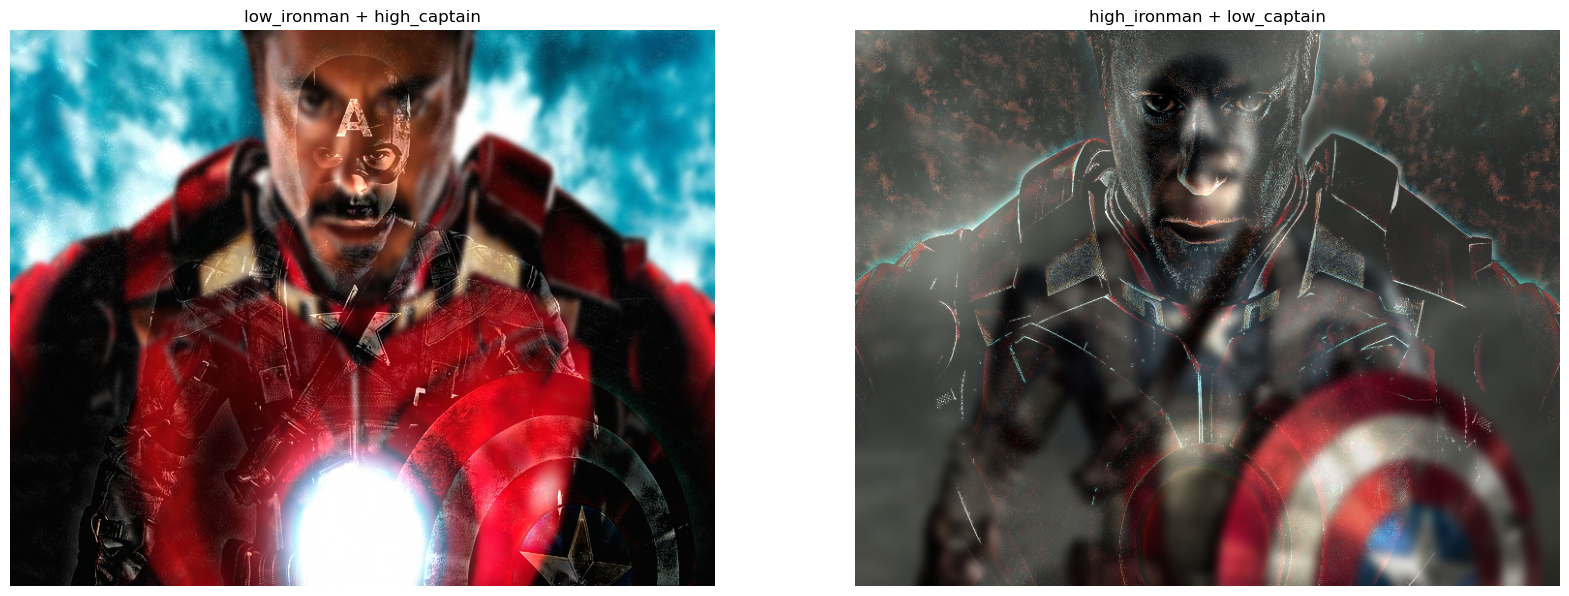

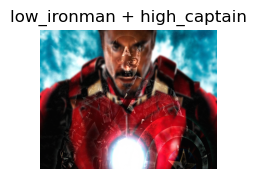

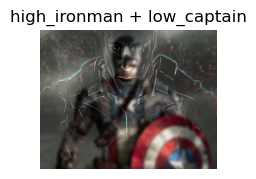

In [18]:
#your solution
# Images must have the same size to combine them
low_iron = np.clip(resize(iron_imgs[1], capt.shape) + capt_imgs[2], 0, 1)
high_iron = np.clip(resize(iron_imgs[2], capt.shape) + capt_imgs[1], 0, 1)

# Normal size: we see high frequencies
fig=plt.figure(figsize=(20,10))

# First image: low_ironman + high_captain
fig.add_subplot(1,2,1)
plt.imshow(low_iron)
plt.title('low_ironman + high_captain')
plt.axis('off')

# Second image: high_ironman + low_captain
fig.add_subplot(1,2,2)
plt.imshow(high_iron)
plt.title('high_ironman + low_captain')
plt.axis('off')
plt.show()

# Reduced size: we see low frequencies
fig=plt.figure(figsize=(5,5))

# First image: low_ironman + high_captain
fig.add_subplot(1,2,1)
plt.imshow(low_iron)
plt.title('low_ironman + high_captain')
plt.axis('off')

fig=plt.figure(figsize=(5,5))

# Second image: high_ironman + low_captain
fig.add_subplot(1,2,1)
plt.imshow(high_iron)
plt.title('high_ironman + low_captain')
plt.axis('off')
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

In [22]:
from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale = 0.5
frames = len(ic)
height = np.int64((ic[0].shape[0]) * scale)
width = np.int64((ic[0].shape[1]) * scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small = np.ndarray(shape=(height, width, 3, frames))

# combine them in ic_small variable
for i in range(frames):
    ic_small[:, :, :, i] = transform.resize(ic[i], (height, width), mode='reflect', anti_aliasing=True, multichannel=True)

print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

%matplotlib nbagg

def updatefig1(i):
    im.set_array(ic_small[:, :, :, i])  # showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:, :, :, 0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat=False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320


TypeError: resize() got an unexpected keyword argument 'multichannel'

In [17]:
import warnings
warnings.filterwarnings("ignore")